# Tello Vision Telemetry Lab

## Sensors Inspector

### Description: inspect IMU, tof, temperature, battery sensors telemetry

See data explanation at [the end of the notebook](#data-explanation).

### Index:
* [Telemetry Analysis Setup](#analysis-setup)
* [TOF Heigth](#tof-heigth)
* [Battery](#battery)
* [Temperature](#temperature)
* [IMU pitch, roll, yaw](#pitch-roll-yaw)
* [IMU vx, vy, vz](#vx-vy-vz)
* [Display Data by trackingMode: IMU vx, vy, vz](#trackMode-imu)
* [Telemetry Data Explanation](#data-explanation)
* [Telemetry Data Filtering](#data-filtering)

### Telemetry Analysis Setup <a class="anchor" id="analysis-setup"></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#Read data
df = pd.read_csv('data/tv_telemetry_210325_122021_demo_trackMode.txt',decimal=".")
df.tail(2)

,timestamp,trackMode,telSeqId,personCount,personConfidence,faceXPx,faceYPx,faceRadiusPx,angle_err,estimatedDistance,...,Uy,pitch,roll,yaw,vx,vy,vz,tof,batt,temp
2709,315429,0,0,0,63,477,190,0,0,55,...,0,9,3,-4,0,0,0,10,12,69
2710,315530,0,0,0,63,477,190,0,0,55,...,0,9,3,-4,0,0,0,10,12,69


In [7]:
#Extract data columns
timestamp=df["timestamp"]
trackMode=df["trackMode"]
telSeqId=df["telSeqId"]
personCount=df["personCount"]
personConfidence=df["personConfidence"]
faceXPx=df["faceXPx"]
faceYPx=df["faceYPx"]
faceRadius=df["faceRadiusPx"]
theta=df["angle_err"]
estimatedDistance=df["estimatedDistance"]
yPos=df["estimatedYPos"]
Uyaw=df["Uyaw"]
Ux=df["Ux"]
Uy=df["Ux"]
Uz=df["Uz"]
pitch=df["pitch"]
roll=df["roll"]
yaw=df["yaw"]
vx=df["vx"]
vy=df["vy"]
vz=df["vz"]
tof=df["tof"]
batt=df["batt"]
temp=df["temp"]

#Save fig dpi definition
dpiSelected=72

### TOF Heigth <a class="anchor" id="tof-heigth"></a>

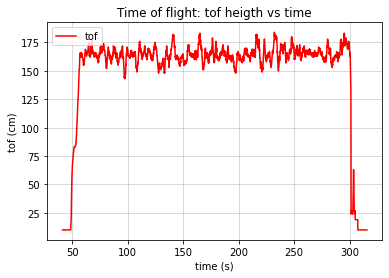

In [8]:
plt.plot(timestamp/1000,tof,'r')
plt.xlabel('time (s)')
plt.ylabel('tof (cm)')
plt.title('Time of flight: tof heigth vs time')
plt.legend(['tof'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/tof.jpg",dpi=dpiSelected)
plt.show()

### Battery <a class="anchor" id="battery"></a>

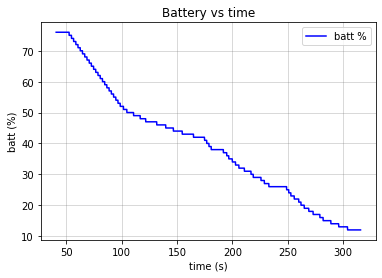

In [11]:
plt.plot(timestamp/1000,batt,'b')
plt.ylabel('batt (%)')
plt.xlabel('time (s)')
plt.title('Battery vs time')
plt.legend(['batt %'],loc='upper right')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/battery.jpg",dpi=dpiSelected)
plt.show()


### Temperature <a class="anchor" id="temperature"></a>

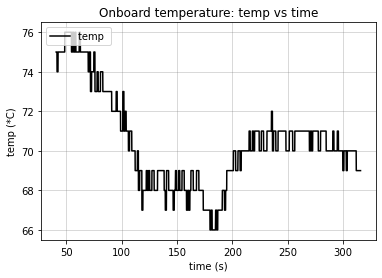

In [12]:
plt.plot(timestamp/1000,temp,'k')
plt.ylabel('temp (*C)')
plt.xlabel('time (s)')
plt.title('Onboard temperature: temp vs time')
plt.legend(['temp '],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/temp.jpg",dpi=dpiSelected)
plt.show()

### IMU pitch, roll, yaw <a class="anchor" id="pitch-roll-yaw"></a>

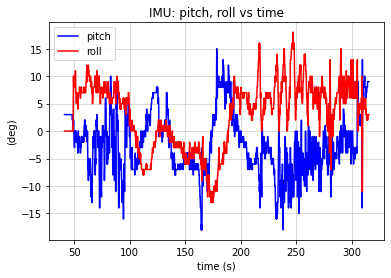

In [13]:
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r')
plt.ylabel('(deg)')
plt.xlabel('time (s)')
plt.title('IMU: pitch, roll vs time')
plt.legend(['pitch','roll'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/pitch-roll.jpg",dpi=dpiSelected)
plt.show()

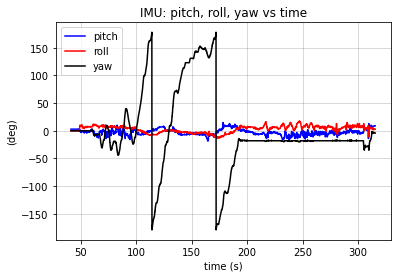

In [14]:
plt.plot(timestamp/1000,pitch,'b',timestamp/1000,roll,'r',timestamp/1000,yaw,'k')
plt.ylabel('(deg)')
plt.xlabel('time (s)')
plt.title('IMU: pitch, roll, yaw vs time')
plt.legend(['pitch','roll','yaw'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/ptich-roll-yaw.jpg",dpi=dpiSelected)
plt.show()

### IMU vx, vy, vz <a class="anchor" id="vx-vy-vz"></a>

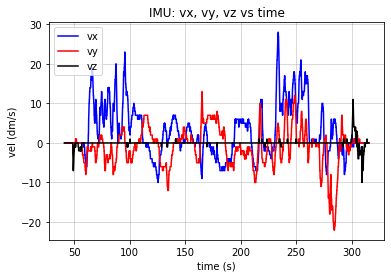

In [17]:
plt.plot(timestamp/1000,vx,'b',timestamp/1000,vy,'r',timestamp/1000,vz,'k')
plt.ylabel('vel (dm/s)')
plt.xlabel('time (s)')
plt.title('IMU: vx, vy, vz vs time')
plt.legend(['vx','vy','vz'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/vx-vy-vz.jpg",dpi=dpiSelected)
plt.show()

### Display Data by trackingMode: IMU vx, vy, vz <a class="anchor" id="trackMode-imu"></a>

In [19]:
#Select tracking Mode to display
# 0 -> None
# 1 -> Spotlight
# 2 -> Follow
# 3 -> Orbit
# 4 -> Profile
# 5 -> Party
# 6 -> Go forward with Person Avoidance

#Choose trackMode code
trackModeCode=3
dataSelector=(trackMode==trackModeCode)
print(trackMode.value_counts())
if(len(trackMode[dataSelector])>0):
    print("\ntrackMode {:d} has {:d}/{:d} data in current telemetry file".format(trackModeCode,len(trackMode[dataSelector]),len(trackMode)))
else:
    print("\ntrackMode {:d} not present in current telemetry file".format(trackModeCode))


3    935
4    835
2    401
0    342
6    198
Name: trackMode, dtype: int64

trackMode 3 has 935/2711 data in current telemetry file


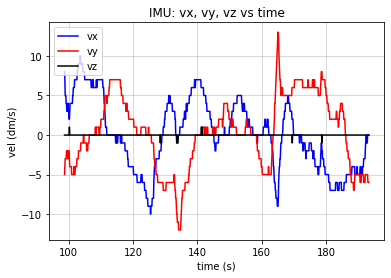

In [20]:

plt.plot(timestamp[dataSelector]/1000,vx[dataSelector],'b',timestamp[dataSelector]/1000,vy[dataSelector],'r',timestamp[dataSelector]/1000,vz[dataSelector],'k')
plt.ylabel('vel (dm/s)')
plt.xlabel('time (s)')
plt.title('IMU: vx, vy, vz vs time')
plt.legend(['vx','vy','vz'],loc='upper left')
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.3)
plt.grid(b=True, which='minor', color='#666666', linestyle='-',alpha=0.3)
plt.savefig("out/jpg/sensors/vx-vy-vz-trackMode.jpg",dpi=dpiSelected)
plt.show()

## Telemetry Data Explanation <a class="anchor" id="data-explanation"></a>

### timestamp 
Data timestamp (milliseconds).

### trackMode
Tracking Mode coded as follows:

0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

### telSeqId
An incremental number used to manually mark flight phases. Use the Tello Vision 1D app button "Tel ID ++" to mark sequences of interest.

### personCount
Detected person count.

### personConfidence
Detection confidence for the foreground person (%).

### faceXPx, faceYPx, faceRadiusPx
Detection center and apparent face radius for the foreground person (pixels).

### angle_err
Horizontal angle error between the detected face and the center of the image (degrees)

### estimatedDistance
3D Distance between the drone and the detected face (cm).

### estimatedXPos, estimatedYPos, estimatedZPos
estimatedDistance decomposed in the (X,Y,Z) drone frame reference (cm).

X is in the drone right direction, Y is in the drone down direction, Z is in the drone forward direction.

### Uyaw, Uz, Ux, Uy
Speed commands sent to the drone (approximated deg/s and cm/s)

### pitch, roll, yaw
Eulerian angles from the IMU (degrees).

### vx, vy, vz
Velocities from the IMU (decimeter/s).

X is drone's initial forward direction, Y is drone's initial right direction, Z is drone's down direction.

### tof
Drone height from the Time Of Flight sensor (cm).

### batt
Drone battery level (%).

### temp
Drone temperature (°C).

## Telemetry Data Filtering <a class="anchor" id="data-filtering"></a>
Displaying many minutes of telemetry data all in the same plot can be difficult to interpret.
The key is to filter and select data to make the analysis simpler.
It is possible to leverage Python powerful Pandas Data Analysis Library and Tello Vision Telemetry Lab data columns definition.
For example, the trackMode column classifies data by the flight tracking mode active in each moment.
Autonomous tracking modes are coded as follows:
0 -> None, 
1 -> Spotlight,
2 -> Follow,
3 -> Orbit, 
4 -> Profile, 
5 -> Party,
6 -> Forward with person avoidance.

So the following lines  of code:

*tofFollow=(tof[trackMode==2])*

*tofOrbit=(tof[trackMode==3])*

select only Time of Flight data of the Follow mode and the Orbit mode giving the possibility to plot them in two separate figures.
